In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### **Data Preparation**

In [2]:
data = 'https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv'

In [3]:
#read data into dataframe (df)
df = pd.read_csv(data)

In [4]:
#first five rows of df
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [5]:
#make all the column names lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'student_id', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [6]:
#removing student_id column
del df['student_id']

In [7]:
#filling missing values with zero
df = df.fillna(0)

In [8]:
#train/validation/test split with 60%/20%/20% distribution
from sklearn.model_selection import train_test_split

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
#reset index of the split dataframes
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
#create target variables
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

In [12]:
#delete jamb_score column from the training, validation & testing set
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [13]:
df_train

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,20,72,3,4.4,Public,Urban,No,Yes,Medium,Low,21,Female,Low,0,3
1,11,80,2,3.3,Public,Urban,Yes,Yes,Medium,High,22,Female,Medium,Secondary,1
2,31,82,1,8.3,Public,Urban,Yes,Yes,Low,High,19,Female,High,Tertiary,2
3,29,79,1,15.8,Public,Rural,Yes,Yes,Low,Low,19,Male,Low,Primary,2
4,28,96,2,8.9,Private,Rural,Yes,Yes,Medium,Low,19,Male,High,Secondary,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,79,3,12.2,Public,Urban,No,No,Low,High,17,Male,High,Secondary,1
2996,3,87,1,9.6,Public,Urban,No,No,Medium,Medium,17,Male,Medium,Primary,1
2997,17,96,4,13.7,Private,Urban,No,Yes,High,Medium,16,Male,Medium,Primary,2
2998,25,74,2,3.4,Public,Rural,No,No,High,High,21,Male,Low,Secondary,1


In [14]:
#get features/feature matrix using DictVectorizer
from sklearn.feature_extraction import DictVectorizer

In [15]:
dv = DictVectorizer(sparse=False)

In [16]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [17]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [18]:
dv.get_feature_names_out()

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level', 'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

### **Training A Decision Tree Regressor**

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [21]:
from sklearn.tree import export_text

In [22]:
#visualize tree
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- study_hours_per_week <= 18.50
|   |--- class: 118
|--- study_hours_per_week >  18.50
|   |--- class: 190



###### From the above output, it is shown that the feature used to split the data at max_depth = 1 is study_hours_per_week

### **Training Random Forest Regressor**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import root_mean_squared_error

In [24]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [25]:
#predictions
y_pred = rf.predict(X_val)

In [26]:
#RSME of randomforest model on validation data
root_mean_squared_error(y_val, y_pred)

65.51460142594168

##### Using different values for n_estimators parameter:

In [27]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    scores.append((n, rmse))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

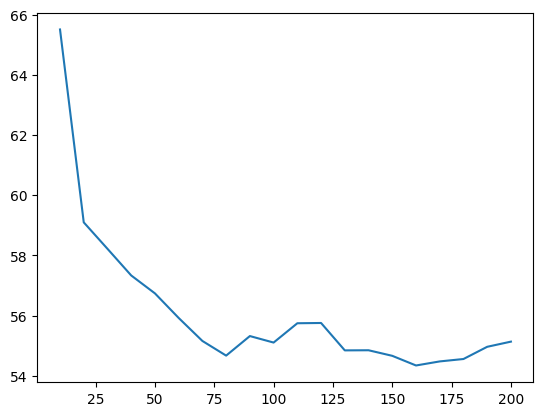

In [28]:
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

###### From the graph, we can derive that the Root Mean Squared Error (RMSE) stops improving when n_estimators is around 77

##### Using different values for max_depth parameter:

In [29]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        scores.append((d, n, rmse))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])

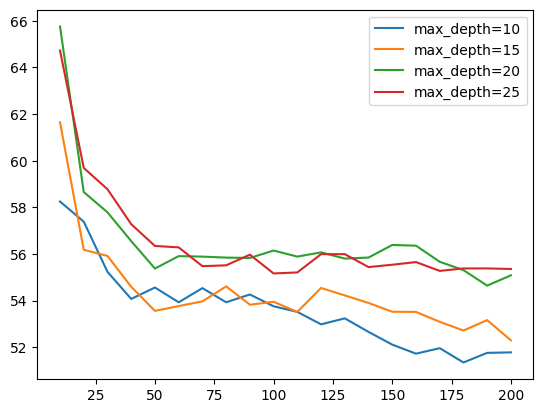

In [30]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label='max_depth=%d' % d)

plt.legend()

###### From the graph, above we can deduce that the max_depth with the best RMSE is 10

### **Feature Importance**

In [31]:
rf = RandomForestClassifier(n_estimators=10, max_depth=20, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=10, random_state=1)

In [32]:
#dataframe of feature importance
df_feature_importance = pd.DataFrame()
df_feature_importance['features'] = dv.get_feature_names_out()
df_feature_importance['importance'] = rf.feature_importances_

In [33]:
#feature importance in descending order
df_feature_importance.sort_values(by='importance', ascending=False)

,features,importance
5,distance_to_school,0.115719
27,study_hours_per_week,0.109333
4,attendance_rate,0.106952
2,age,0.084565
28,teacher_quality,0.057930
3,assignments_completed,0.043678
21,school_location=Urban,0.024921
20,school_location=Rural,0.024887
12,it_knowledge=Medium,0.024752
11,it_knowledge=Low,0.024267


###### From the above dataframe, it seems like the feature with the most importnace is distance_to_school

### **Training An XGBoost Model**

In [34]:
import xgboost as xgb

In [35]:
#DMatrix for train and validation
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [36]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

##### Where eta = 0.3:

In [37]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

[0]	train-rmse:42.69552	val-rmse:44.86028
[1]	train-rmse:39.85005	val-rmse:43.06070
[2]	train-rmse:37.95285	val-rmse:41.83772
[3]	train-rmse:36.52203	val-rmse:41.26987
[4]	train-rmse:35.36066	val-rmse:41.02965
[5]	train-rmse:34.43646	val-rmse:40.87186
[6]	train-rmse:33.71528	val-rmse:40.69132
[7]	train-rmse:33.07449	val-rmse:40.65074
[8]	train-rmse:32.41772	val-rmse:40.72710
[9]	train-rmse:31.91000	val-rmse:40.82972
[10]	train-rmse:31.55119	val-rmse:40.83684
[11]	train-rmse:30.99534	val-rmse:40.98243
[12]	train-rmse:30.33163	val-rmse:41.05515
[13]	train-rmse:30.04347	val-rmse:41.18635
[14]	train-rmse:29.44279	val-rmse:41.32160
[15]	train-rmse:29.08791	val-rmse:41.37832
[16]	train-rmse:28.84106	val-rmse:41.45737
[17]	train-rmse:28.28883	val-rmse:41.51113
[18]	train-rmse:27.90071	val-rmse:41.55139
[19]	train-rmse:27.60694	val-rmse:41.66496
[20]	train-rmse:27.24424	val-rmse:41.80313
[21]	train-rmse:26.79013	val-rmse:41.88767
[22]	train-rmse:26.64232	val-rmse:41.90488
[23]	train-rmse:26.31

In [38]:
y_pred = model.predict(dval)

In [39]:
root_mean_squared_error(y_val, y_pred)

44.432098388671875

##### Where eta = 0.1:

In [40]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

[0]	train-rmse:45.50072	val-rmse:46.99373
[1]	train-rmse:44.12583	val-rmse:45.89771
[2]	train-rmse:42.92815	val-rmse:45.01746


[3]	train-rmse:41.90445	val-rmse:44.27569
[4]	train-rmse:40.94238	val-rmse:43.62411
[5]	train-rmse:40.15460	val-rmse:43.05644
[6]	train-rmse:39.43451	val-rmse:42.64605
[7]	train-rmse:38.77902	val-rmse:42.28889
[8]	train-rmse:38.17103	val-rmse:42.00035
[9]	train-rmse:37.60436	val-rmse:41.73633
[10]	train-rmse:37.11353	val-rmse:41.55631
[11]	train-rmse:36.65501	val-rmse:41.33670
[12]	train-rmse:36.26337	val-rmse:41.18307
[13]	train-rmse:35.84634	val-rmse:41.03057
[14]	train-rmse:35.45796	val-rmse:40.89024
[15]	train-rmse:35.07766	val-rmse:40.70892
[16]	train-rmse:34.73181	val-rmse:40.60601
[17]	train-rmse:34.40922	val-rmse:40.47982
[18]	train-rmse:34.13466	val-rmse:40.43780
[19]	train-rmse:33.88018	val-rmse:40.38390
[20]	train-rmse:33.57997	val-rmse:40.37859
[21]	train-rmse:33.33993	val-rmse:40.33974
[22]	train-rmse:33.08144	val-rmse:40.31700
[23]	train-rmse:32.90907	val-rmse:40.27079
[24]	train-rmse:32.67941	val-rmse:40.24539
[25]	train-rmse:32.50134	val-rmse:40.21661
[26]	train-rmse:32

In [41]:
y_pred = model.predict(dval)

In [42]:
root_mean_squared_error(y_val, y_pred)

41.04335403442383

###### Between eta value of 0.3 & 0.1, 0.1 has the best RMSE score on the validation dataset